
# PCA 
## Working Principle Introduction
PCA starts with the standardization of the data. It then computes the covariance matrix to identify correlations between variables. From the covariance matrix, it derives the eigenvalues and eigenvectors. The eigenvectors define the directions of the new axis in the feature space, and the eigenvalues define their magnitude. By projecting the data onto these new axes, PCA provides a reduced-dimensional representation where the first few components retain most of the variation present in the original dataset.
 
 Here are Principal Component Analysis (PCA) formulas:

1. Data Standardization: Standardize the dataset $X$ by subtracting the mean and dividing by the standard deviation for each feature. The standardized dataset is denoted as $X_{std}$.

$$ X_{std} = \frac{X - \mu}{\sigma} $$

Where $\mu$ is the mean and $\sigma$ is the standard deviation.

2. Covariance Matrix: Compute the covariance matrix of the standardized data.

$$ \Sigma = \frac{1}{n-1} X_{std}^T X_{std} $$

Where $n$ is the number of samples.

3. Eigenvalues and Eigenvectors: Perform eigendecomposition on the covariance matrix $\Sigma$ to find its eigenvalues and corresponding eigenvectors.

$$ \Sigma v = \lambda v $$

Where $v$ represents an eigenvector and $\lambda$ is the corresponding eigenvalue.

4. Principal Components Selection: Sort the eigenvalues in descending order and choose the top $k$ eigenvalues and their corresponding eigenvectors. Here, $k$ is the number of principal components desired.

5. Projection Matrix: Form a projection matrix $W$ from the selected eigenvectors.

6. Transformation to New Space: Transform the original dataset $X_{std}$ to the new feature space using the projection matrix $W$.

$$ X_{pca} = X_{std} W $$

<div align="center">
<img src="PCA.jpg" alt="alt text" width="350"/>
</div>

This plot demonstrates how PCA reduces the dimensionality of data by transforming the original data features into new principal components. The orientation of the data along these new axes highlights the directions where the data varies the most.



## Data Processing
In the data processing part, I worked with the Wine Quality dataset. My focus was on cleaning the data by handling missing values and then standardizing the data, which is crucial for effective PCA application.


In [3]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, delimiter=';')
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:

# Check for missing values
wine_data.isnull().sum()

# Fill missing values if necessary or drop them
# wine_data = wine_data.fillna(method='ffill')

# Standardizing the features
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_data)



## PCA Implementation
In this section of my PCA analysis, after applying PCA to the standardized Wine Quality dataset, I determined that retaining nine principal components was optimal. This decision was informed by the cumulative explained variance plot, which indicated that the first nine components accounted for more than 95% of the variance in the dataset. 


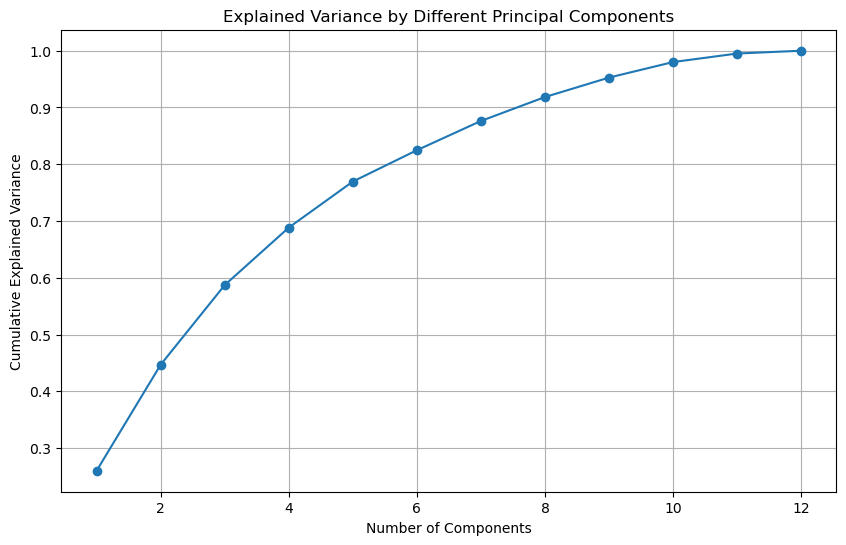

In [12]:
pca = PCA().fit(wine_scaled)

# Cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Correct the x-values to start from 1 up to the number of components
x_values = np.arange(1, len(cumulative_variance) + 1)

# Plot the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(x_values, cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()

In [14]:

pca = PCA(n_components=9)
principal_components = pca.fit_transform(wine_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

# Variance explained by each PC
pca.explained_variance_ratio_


array([0.26009731, 0.1868235 , 0.14024331, 0.10125174, 0.0811053 ,
       0.05521602, 0.05152648, 0.04215605, 0.03427563])

Following that, I performed a transformation to project the data into the principal component space, resulting in a new dataframe with the principal components. Additionally, I extracted the loadings for each component, which indicates how much each original feature contributes to a principal component. This analysis is crucial for feature reduction and to gain insights into the underlying structure of the data.

In [15]:
pca = PCA(n_components=9)
pca.fit(wine_scaled)

# Get the loadings (the components_)
loadings = pca.components_

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings.T,  # Transpose to have features as rows
                           columns=[f'PC{i+1}' for i in range(loadings.shape[0])],
                           index=[f'Feature{i+1}' for i in range(loadings.shape[1])])  # Replace with actual feature names if available

loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Feature1,0.487883,-0.004173,-0.164829,-0.231098,-0.078779,0.055531,-0.307215,0.200529,-0.174578
Feature2,-0.265129,0.338968,-0.227089,0.041858,0.299379,0.297287,-0.626234,0.146126,-0.060223
Feature3,0.473335,-0.137358,0.100229,-0.056736,-0.120149,0.136633,0.244149,0.296333,-0.220975
Feature4,0.139154,0.167736,0.243620,-0.383038,0.709363,0.109311,0.283854,-0.170626,0.278187
Feature5,0.197427,0.189788,-0.026608,0.654778,0.266237,0.337337,0.230547,-0.186923,-0.419936
Feature6,-0.045881,0.259483,0.616111,-0.033711,-0.159413,-0.042648,-0.138260,-0.019356,-0.318000
Feature7,0.004067,0.363971,0.540732,-0.028460,-0.218453,0.115954,-0.110209,0.089897,0.121823
Feature8,0.370301,0.330781,-0.168723,-0.200693,0.208793,-0.425667,-0.122546,0.079500,-0.249074
Feature9,-0.432721,-0.065440,0.069771,-0.005466,0.257647,-0.480354,0.185692,0.314693,-0.461916
Feature10,0.254535,-0.109334,0.212913,0.560502,0.214835,-0.403743,-0.233402,0.275492,0.452689



## Results Visualization
 I created a scatter plot of the first two principal components to show the distribution of the Wine Quality dataset in the transformed feature space. Additionally, I generated a heatmap of the PCA loadings, which illustrates the contribution of each original feature to the principal components. 


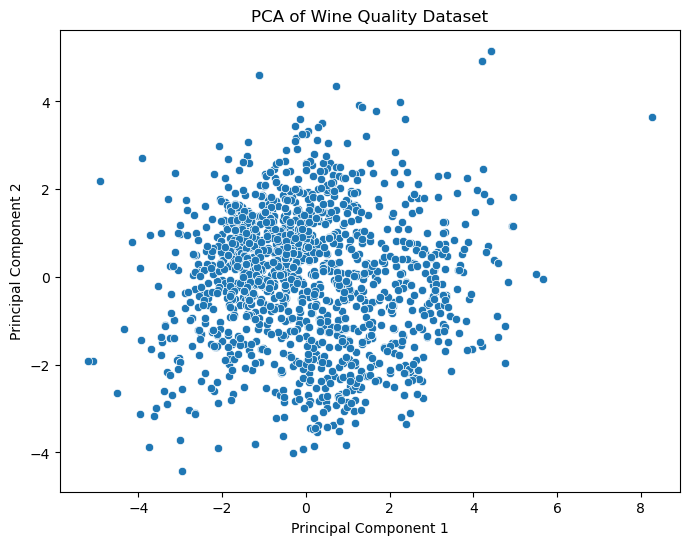

In [10]:

# Scatter plot of the two principal components
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df)
plt.title('PCA of Wine Quality Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


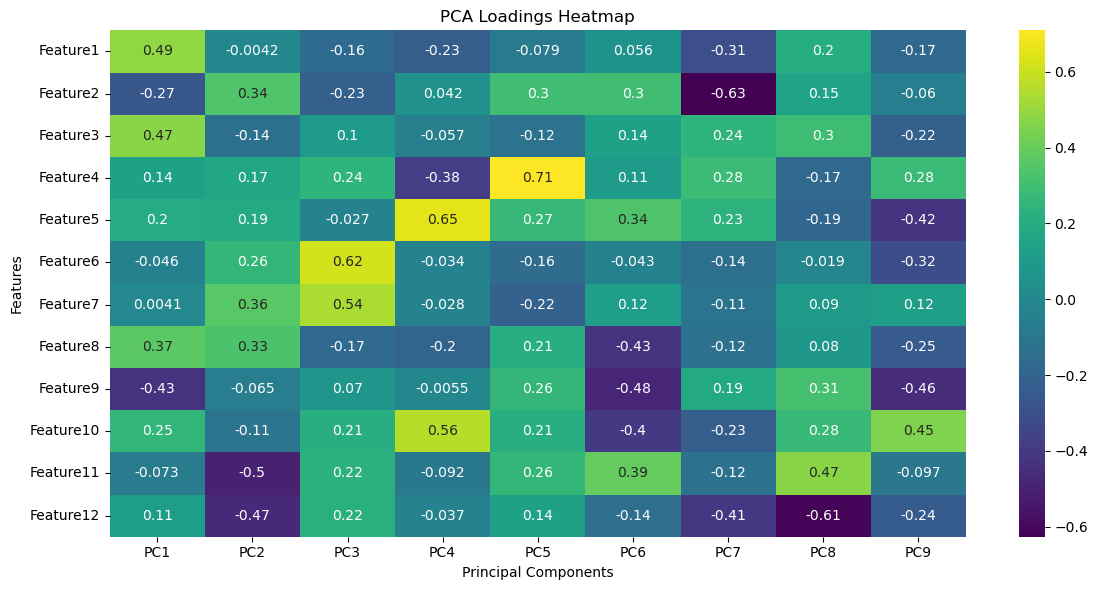

In [16]:
import seaborn as sns

# Assuming 'loadings_df' is the DataFrame with loadings from the PCA as shown in the image
# And assuming it has been correctly calculated from the actual scaled wine dataset

# We will now create a heatmap for the loadings to visualize the contribution of each feature to each principal component

plt.figure(figsize=(12, 6))
sns.heatmap(loadings_df, cmap='viridis', annot=True)
plt.title('PCA Loadings Heatmap')
plt.ylabel('Features')
plt.xlabel('Principal Components')
plt.tight_layout()  # Adjust the layout to make sure labels and titles fit into the plot area
plt.show()


## Conclusion

Following the application of PCA, I chose to retain nine principal components based on the cumulative explained variance surpassing 95%, thereby ensuring that the dimensionality was significantly reduced while still preserving the essence of the data. The scatter plot of the first two principal components did not reveal distinct clusters or patterns, as the points were distributed relatively evenly. The heatmap of the loadings provided insight into the contribution of each feature to the principal components, highlighting which features most influence the variance captured by the PCA. Overall, the PCA provided a more manageable number of features, which could potentially improve the performance of subsequent predictive modeling and provide a clearer understanding of the underlying factors that affect wine quality.
